## Postest 5 KB
**Supervised Learning**

In [383]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

_Mengimport segala Library yang di butuhkan_

In [384]:
df = pd.read_csv("GlobalWeatherRepository.csv")
df.head(10)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1693301400,2023-08-29 05:30,29.0,84.2,Light rain,...,0.8,1.9,1,1,05:53 AM,06:23 PM,05:36 PM,04:09 AM,Waxing Gibbous,93
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1693301400,2023-08-29 06:30,9.0,48.2,Clear,...,2.1,3.5,1,1,07:18 AM,06:34 PM,04:57 PM,06:32 AM,Waxing Gibbous,93
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1693301400,2023-08-29 13:30,31.0,87.8,Partly cloudy,...,5.0,6.2,1,1,06:26 AM,07:39 PM,07:05 PM,03:45 AM,Waxing Gibbous,93
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1693301400,2023-08-29 19:30,13.0,55.4,Clear,...,4.0,5.8,1,1,06:27 AM,05:42 PM,03:19 PM,05:17 AM,Waxing Gibbous,93
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1693301400,2023-08-29 11:30,16.0,60.8,Light rain,...,13.1,14.9,1,2,06:07 AM,07:43 PM,07:27 PM,03:11 AM,Waxing Gibbous,93


__Pertama tama kita lakukan processing dataset agar nilai nilai yang ada mudah di klasifikasi__

In [385]:
col = ['wind_direction']
le=LabelEncoder()
for i in col:
    df[i]=le.fit_transform(df[i])
df.head(10)

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1693301400,2023-08-29 14:00,28.8,83.8,Sunny,...,7.9,11.1,1,1,05:24 AM,06:24 PM,05:39 PM,02:48 AM,Waxing Gibbous,93
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1693301400,2023-08-29 11:30,27.0,80.6,Partly cloudy,...,28.2,29.6,2,3,06:04 AM,07:19 PM,06:50 PM,03:25 AM,Waxing Gibbous,93
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1693301400,2023-08-29 10:30,28.0,82.4,Partly cloudy,...,6.4,7.9,1,1,06:16 AM,07:21 PM,06:46 PM,03:50 AM,Waxing Gibbous,93
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1693301400,2023-08-29 11:30,10.2,50.4,Sunny,...,0.5,0.8,1,1,07:16 AM,08:34 PM,08:08 PM,04:38 AM,Waxing Gibbous,93
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1693301400,2023-08-29 10:30,25.0,77.0,Partly cloudy,...,139.6,203.3,4,10,06:11 AM,06:06 PM,04:43 PM,04:41 AM,Waxing Gibbous,93
5,Antigua and Barbuda,Saint John's,17.12,-61.85,America/Antigua,1693301400,2023-08-29 05:30,29.0,84.2,Light rain,...,0.8,1.9,1,1,05:53 AM,06:23 PM,05:36 PM,04:09 AM,Waxing Gibbous,93
6,Argentina,Buenos Aires,-34.59,-58.67,America/Argentina/Buenos_Aires,1693301400,2023-08-29 06:30,9.0,48.2,Clear,...,2.1,3.5,1,1,07:18 AM,06:34 PM,04:57 PM,06:32 AM,Waxing Gibbous,93
7,Armenia,Yerevan,40.18,44.51,Asia/Yerevan,1693301400,2023-08-29 13:30,31.0,87.8,Partly cloudy,...,5.0,6.2,1,1,06:26 AM,07:39 PM,07:05 PM,03:45 AM,Waxing Gibbous,93
8,Australia,Canberra,-35.28,149.22,Australia/Sydney,1693301400,2023-08-29 19:30,13.0,55.4,Clear,...,4.0,5.8,1,1,06:27 AM,05:42 PM,03:19 PM,05:17 AM,Waxing Gibbous,93
9,Austria,Vienna,48.20,16.37,Europe/Vienna,1693301400,2023-08-29 11:30,16.0,60.8,Light rain,...,13.1,14.9,1,2,06:07 AM,07:43 PM,07:27 PM,03:11 AM,Waxing Gibbous,93


In [386]:
x = df.iloc[:, 18:20]
y = df['condition_text']
y = np.where(y == 'Partly cloudy', 1, np.where(y == 'Clear', 2, -1))


In [387]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [388]:
mm = MinMaxScaler()
mm.fit(x_train)
X_train_normalized = mm.transform(x_train)
X_test_normalized = mm.transform(x_test)

In [389]:
# Buat objek Model SVM
svm = SVC(kernel='poly', C=1.0, gamma='scale')
svm.fit(X_train_normalized, y_train)

SVC(kernel='poly')

In [390]:
y_prediksi = svm.predict(X_test_normalized)
sv = svm.support_vectors_
print(np.unique(y_prediksi))

[-1  1  2]


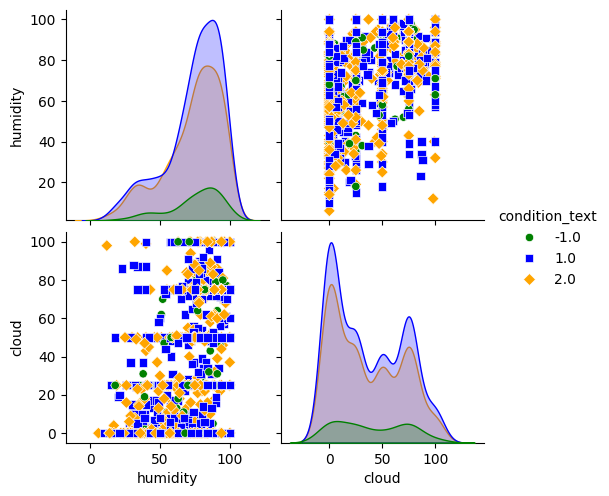

In [391]:
y_prediksi_series = pd.Series(y_prediksi[:len(x)], name='condition_text')

# Combine features and target variable for pair plot
plot_data = pd.concat([x, y_prediksi_series], axis=1)

# Define a custom color palette for each class
palette = {1: 'blue', 2: 'orange', -1: 'green'}

# Create pair plot
sns.pairplot(plot_data, hue='condition_text', markers=['o', 's', 'D'], palette=palette)
plt.show()

__Diatas Merupakan persebaran data berdasarkan cuaca dimana -1 adalah Other, 1 adalah Partly Cloudy, 2 adalah Clear__

<!-- # Plotting sesuai dengan jumlah fitur yang sesuai
plt.scatter(x[y == 1].iloc[:,0], x[y == 1].iloc[:,1], s=40, label='Partly Cloud', marker='o', color='grey')
plt.scatter(x[y == 2].iloc[:,0], x[y == 2].iloc[:,1], s=40, label='Clear', marker='o', color='red')
plt.scatter(x[y == -1].iloc[:,0], x[y == -1].iloc[:,1], s=40, label='Other', marker='o', color='green')
plt.scatter(sv[:, 0], sv[:, 1], s=40, label='support vectors', marker='+', color='yellow')

# Mengatur batas plot dan memvisualisasikan decision boundary
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1]), np.linspace(ylim[0], ylim[1]))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

plt.figure(figsize=(10, 6))
plt.show() -->

In [392]:
# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_prediksi)
class_report = classification_report(y_test, y_prediksi)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[105 176  85]
 [ 12 579   4]
 [  4  15 540]]

Classification Report:
              precision    recall  f1-score   support

          -1       0.87      0.29      0.43       366
           1       0.75      0.97      0.85       595
           2       0.86      0.97      0.91       559

    accuracy                           0.81      1520
   macro avg       0.83      0.74      0.73      1520
weighted avg       0.82      0.81      0.77      1520



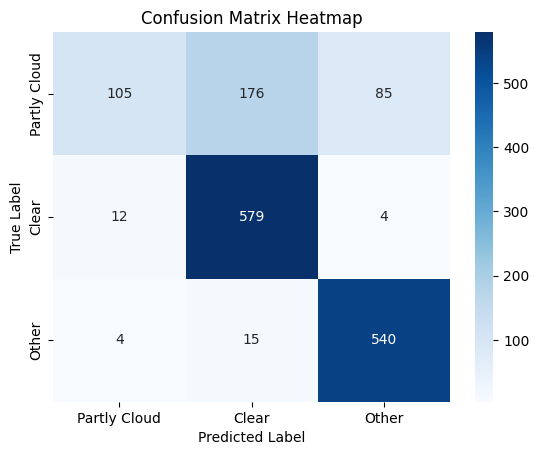

In [393]:
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Partly Cloud', 'Clear', 'Other'],
            yticklabels=['Partly Cloud', 'Clear', 'Other'])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

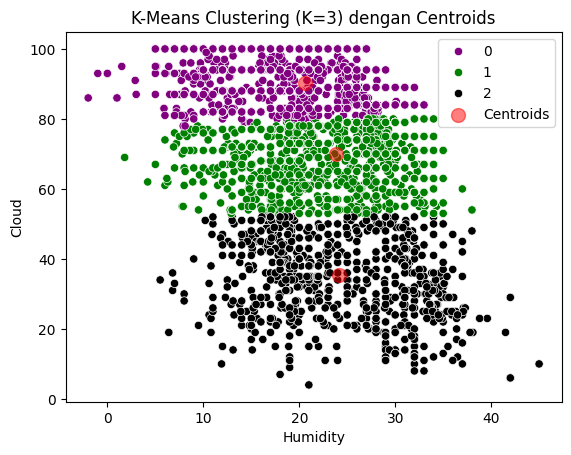

In [401]:
# Gunakan fitur X
X = df[["temperature_celsius", "humidity"]]
K = 3 # Pilih angka banyaknya kelompok (K)
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) # Latih model K-Means berdasarkan data X
cluster_labels = kmeans.labels_ # Label kelompok dari model
df["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model
# Visualisasikan kelompok (kluster) data Iris
warna = ["purple", "green", "black"]
sns.scatterplot(data=df, x="temperature_celsius", y="humidity", hue="cluster", palette=warna)
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,

label='Centroids')


plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Humidity")
plt.ylabel("Cloud")
plt.legend()
plt.show()

In [402]:
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

Silhouette Score: 0.46
Davies-Bouldin Index: 0.74
Calinski-Harabasz Index: 9511.78


In [403]:
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score # HCV-M
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["humidity"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["humidity"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘species’ menjadi numerik
true_labels_num = df["humidity"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(df["humidity"], cluster_labels)
completeness = completeness_score(df["humidity"], cluster_labels)
v_measure = v_measure_score(df["humidity"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
humidity  4    6    7    8    9    10   11   12   13   14   ...  91   92   \
cluster                                                     ...             
0           0    0    0    0    0    0    0    0    0    0  ...   18   23   
1           0    0    0    0    0    0    0    0    0    0  ...    0    0   
2           1    2    1    2    1    4    7    7    4    8  ...    0    0   

humidity  93   94   95   96   97   98   99   100  
cluster                                           
0          41  533   20   25   17    9    1  277  
1           0    0    0    0    0    0    0    0  
2           0    0    0    0    0    0    0    0  

[3 rows x 96 columns] 

Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.41
Homogeneity Score: 0.26
Completeness Score: 0.99
V-Measure Score: 0.41


In [414]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, homogeneity_score, completeness_score, v_measure_score
import seaborn as sns
import matplotlib.pyplot as plt

# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(df["cluster"], df["humidity"])
print("Cross-Tabulation:")
print(cross_tab, "\n")

# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(df["humidity"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")

# Normalized Mutual Information (NMI)
true_labels_num = df["humidity"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")

# Fungsi HCV-M
homogeneity = homogeneity_score(df["humidity"], cluster_labels)
completeness = completeness_score(df["humidity"], cluster_labels)
v_measure = v_measure_score(df["humidity"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")



Cross-Tabulation:
humidity  4    6    7    8    9    10   11   12   13   14   ...  91   92   \
cluster                                                     ...             
0           0    0    0    0    0    0    0    0    0    0  ...   18   23   
1           0    0    0    0    0    0    0    0    0    0  ...    0    0   
2           1    2    1    2    1    4    7    7    4    8  ...    0    0   

humidity  93   94   95   96   97   98   99   100  
cluster                                           
0          41  533   20   25   17    9    1  277  
1           0    0    0    0    0    0    0    0  
2           0    0    0    0    0    0    0    0  

[3 rows x 96 columns] 

Adjusted Rand Index (ARI): 0.11
Normalized Mutual Information (NMI): 0.41
Homogeneity Score: 0.26
Completeness Score: 0.99
V-Measure Score: 0.41


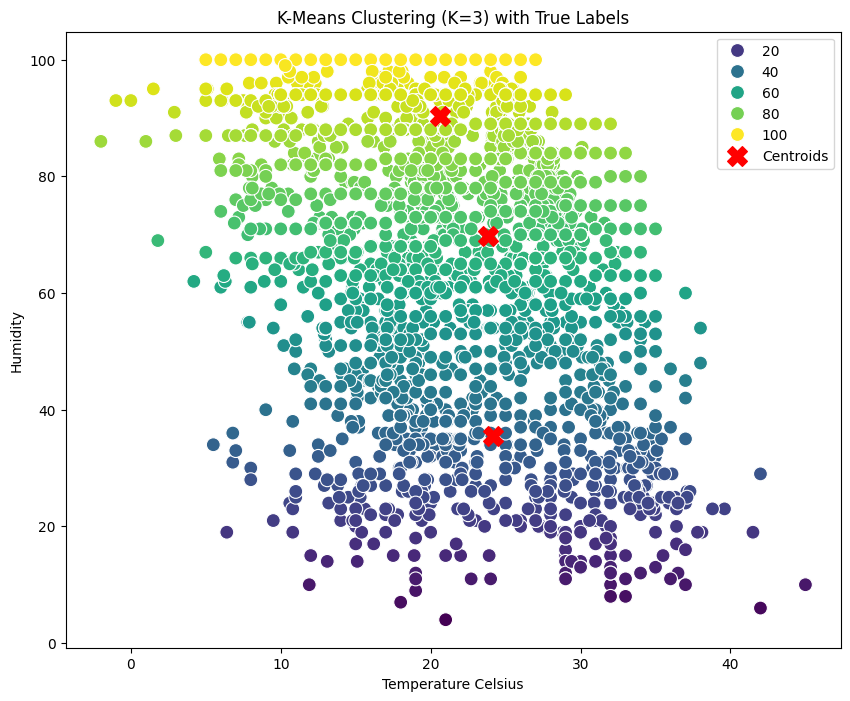

In [415]:
# Visualisasi hasil clustering dengan label asli
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x="temperature_celsius", y="humidity", hue="humidity", palette="viridis", s=100)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=200, label='Centroids')

plt.title(f"K-Means Clustering (K={K}) with True Labels")
plt.xlabel("Temperature Celsius")
plt.ylabel("Humidity")
plt.legend()
plt.show()